In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from modcma.c_maes import sampling


import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams.update({'font.size': 15})

In [2]:
samplers = (
    sampling.CauchyTransformer,
    sampling.DoubleWeibullTransformer,
    sampling.GaussianTransformer,
    sampling.LaplaceTransformer,
    sampling.LogisticTransformer,
    sampling.UniformScaler,    
)


def get_sampler(d, transformer):
    base_sampler = sampling.Uniform(d)
    sampler = sampler_cls(base_sampler)
    return sampler


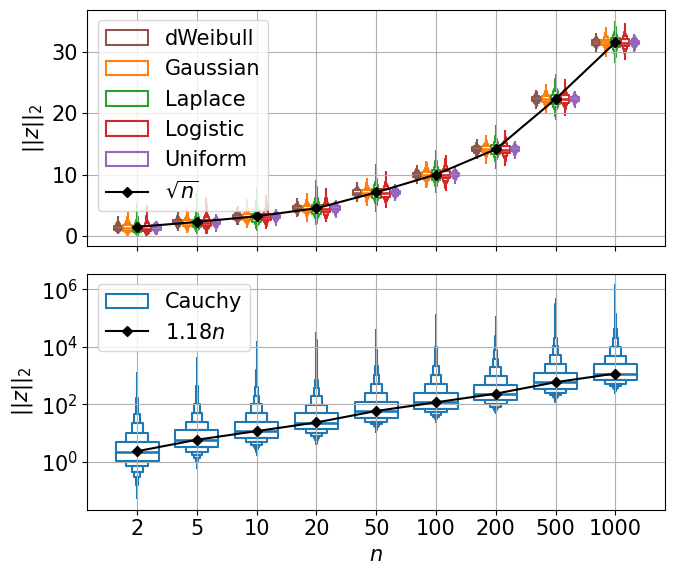

In [10]:
n_samples = 10000

def get_name(sampler_cls):
    return sampler_cls.__name__.replace("Transformer", "").replace("Scaler", "").replace("Double", "d")

records = []
dims = np.array((2, 5, 10, 20, 50, 100, 200, 500, 1000))
for i, (sampler_cls) in enumerate(samplers):
    for d in dims:
        sampler = get_sampler(d, sampler_cls)
        samples = [(get_name(sampler_cls), d, np.linalg.norm(sampler())) for _ in range(n_samples)]
        records.extend(samples)

colums = ["Sampler", r"$n$", r"$||z||_2$"]
data = pd.DataFrame(records, columns = colums)

palette = dict(zip(sorted(data['Sampler'].unique()), sns.color_palette("tab10")))

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(7, 6), sharex=True)
sns.boxenplot(data[data['Sampler'] != 'Cauchy'], x=colums[1], hue=colums[0], y=colums[2], fill=False, gap=.1, showfliers=False, ax=ax1, palette=palette)
ax1.plot(range(len(dims)), np.sqrt(dims), marker='D', markersize=5, label=r'$\sqrt{n}$', color='black')


ax1.legend()
ax1.grid()

sns.boxenplot(data[data['Sampler'] == 'Cauchy'], x=colums[1], hue=colums[0], y=colums[2], fill=False, gap=.1, showfliers=False, ax=ax2, palette=palette)
ax2.plot(range(len(dims)), 1.18 * dims, marker='D', markersize=5, label=r'1.18${n}$', color='black')
ax2.set_yscale("log")
ax2.legend(loc='upper left')
ax2.grid()
plt.tight_layout()
plt.savefig("figures/distributions_z.pdf")


(0.12156862745098039, 0.4666666666666667, 0.7058823529411765)

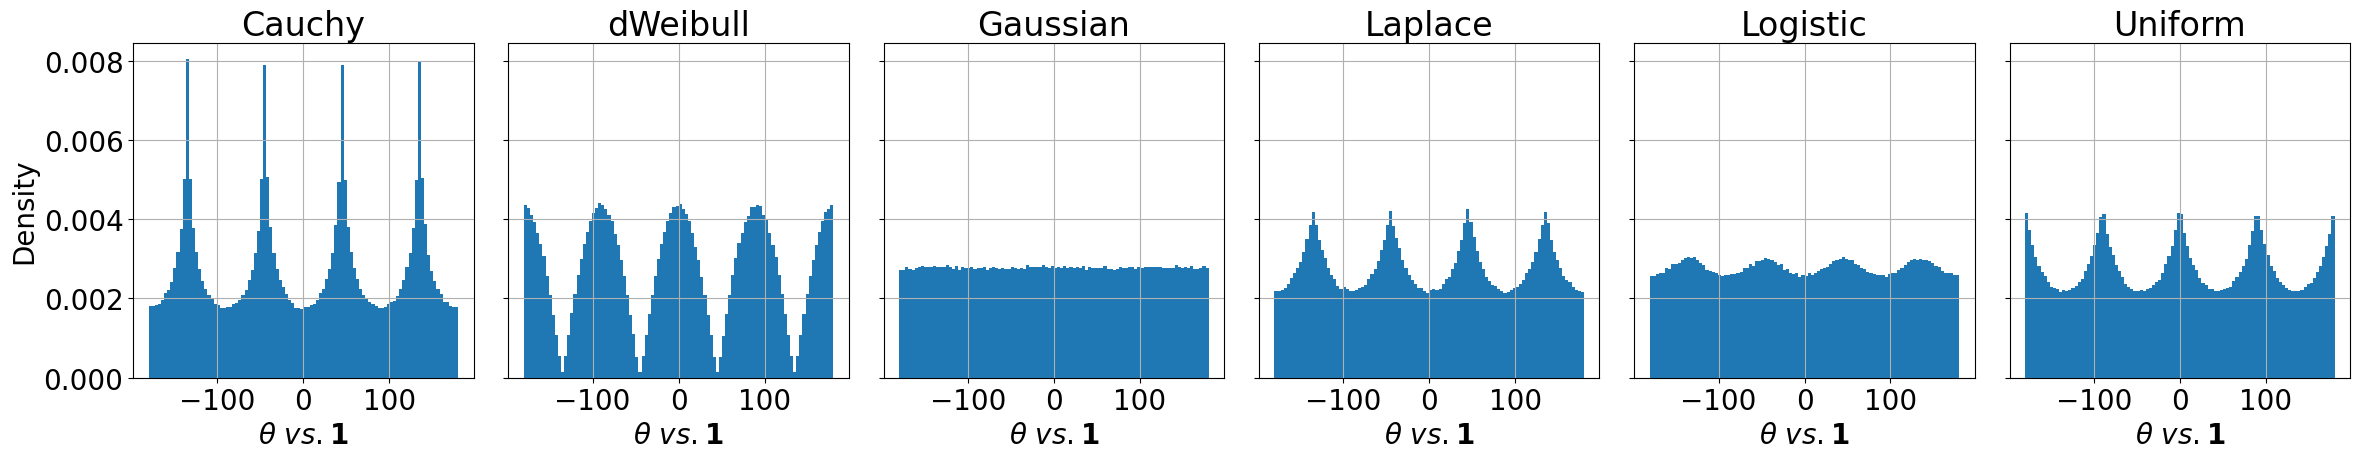

In [4]:
n_samples = 1000000
n = 2

matplotlib.rcParams.update({'font.size': 20})

def angle_with_all_ones(vector):
    # Convert input to a numpy array
    vector = np.array(vector)
    all_ones = np.ones_like(vector)
    dot_product = np.dot(vector, all_ones)

    # Compute the magnitudes
    magnitude_v = np.linalg.norm(vector)
    magnitude_ones = np.linalg.norm(all_ones)

    # Compute the cosine of the angle
    cos_theta = dot_product / (magnitude_v * magnitude_ones)

    # Ensure the value is within the valid domain for arccos [-1, 1] (handle numerical precision issues)
    cos_theta = np.clip(cos_theta, -1.0, 1.0)

    # Compute the angle in radians and convert to degrees
    angle_radians = np.arccos(cos_theta)
    angle_degrees = np.degrees(angle_radians)
    
    clockwise = -np.sign(dot_product * np.cross(vector, all_ones))
    
    return angle_degrees * clockwise


f, axes = plt.subplots(1, len(samplers), figsize=(4*len(samplers), 5 * (2 - 1)), sharex=True, sharey='row')

axes[0].set_ylabel(r"Density")
for ax, sampler_cls in zip(axes.ravel(), samplers):
    sampler = get_sampler(n, sampler_cls)
    samples = np.array([sampler() for s in range(n_samples)]).T
    # samples = np.abs(samples)
    directions = samples / np.linalg.norm(samples, axis=0)
    angles2 = np.array([angle_with_all_ones(s) for s in directions.T]).ravel()
    
    ax.hist(angles2, bins=100, density=True)
    # ax.set_title(f"{get_name(sampler_cls)}: ({np.mean(angles2):.2f}+-{np.std(angles2):.2f})")
    ax.set_title(f"{get_name(sampler_cls)}")

    ax.grid()
    
    ax.xaxis.set_tick_params(which='both', labelbottom=True)
    ax.set_xlabel(r"$\theta\ vs. \mathbf{1}$")

plt.tight_layout()
plt.savefig(f"figures/angles_vs_unitvec_n{n}.pdf")


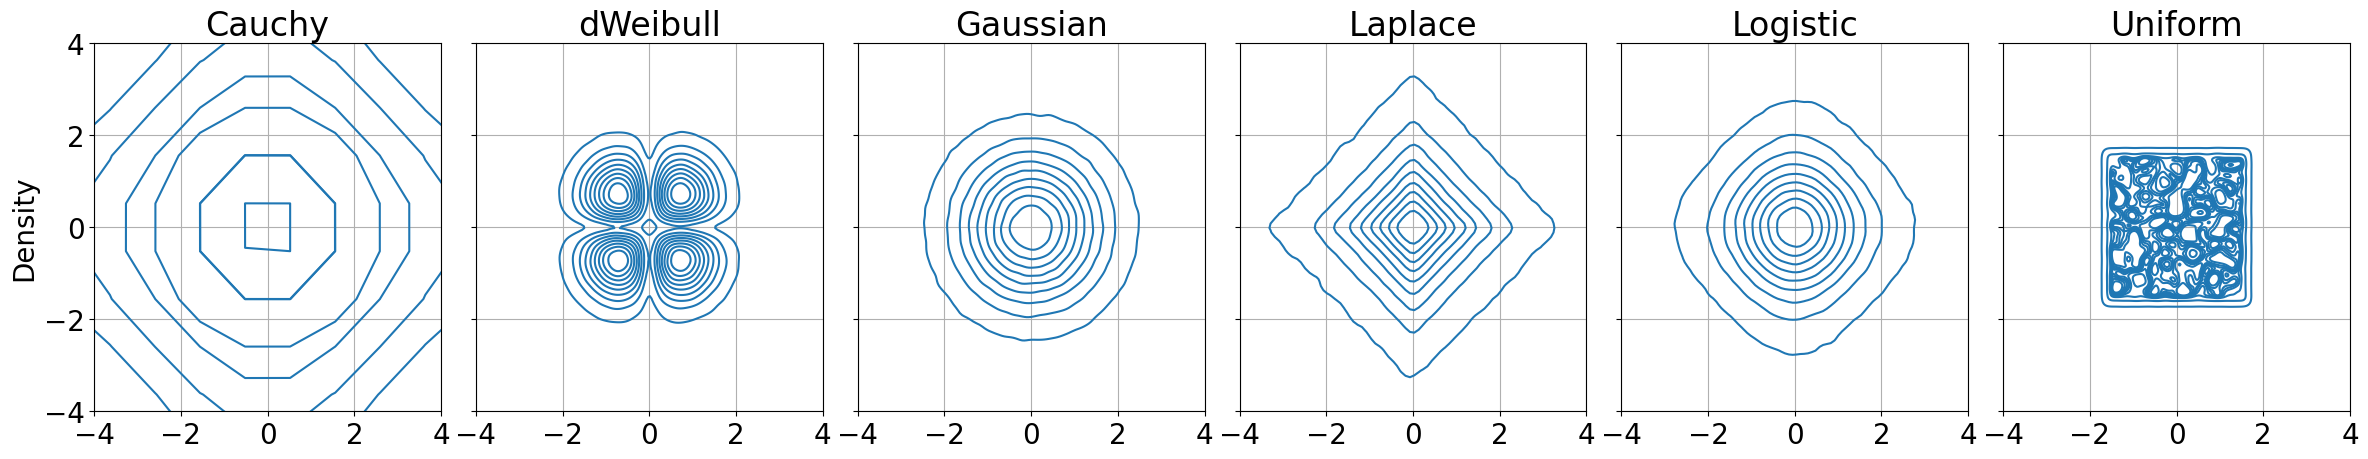

In [5]:
n_samples = int(10e5)
n = 2

matplotlib.rcParams.update({'font.size': 20})

f, axes = plt.subplots(1, len(samplers), figsize=(4*len(samplers), 5 * (2 - 1)), sharex=True, sharey='row')

axes[0].set_ylabel(r"Density")
for ax, sampler_cls in zip(axes.ravel(), samplers):
    sampler = get_sampler(n, sampler_cls)
    samples = np.array([sampler() for s in range(n_samples)]).T
    # samples = np.abs(samples)
    # directions = samples / np.linalg.norm(samples, axis=0)
    try:
        sns.kdeplot(x=samples[0].clip(-100, 100), y=samples[1].clip(-100, 100), ax=ax)
    except:
        continue
    ax.set_title(f"{get_name(sampler_cls)}")

    # ax.xaxis.set_tick_params(which='both', labelbottom=True)
    # ax.set_xlabel(r"$\theta\ vs. \mathbf{1}$")
    ax.set_xlim(-4, 4)
    ax.set_ylim(-4, 4)
    ax.grid()

plt.tight_layout()

In [6]:
vector = np.array([0, -1])


